# **Introduction to Data Visualization**

Visualisasi Data adalah penyajian data dalam format gambar atau grafik. Visualisasi Data juga bisa didefinisikan sebagai disiplin untuk memahami data dengan menyajikannya secara visual sehingga pola atau tren, komposisi, perbandingan dan hubungan apa pun dapat diekspos

Kita dapat memanfaatkan visualisasi data untuk mengeksplorasi data untuk menemukan insight dari data kita. Kita juga dapat berbagi temuan kita dengan orang lain dengan menggunakan visualisasi data. Otak manusia lebih mudah memproses informasi apapun menggunakan visualisasi daripada spreadsheet atau laporan.
___

In [1]:
# data manipulation
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

## **1. Scatter Plot**

Scatter plot atau diagram titik terdiri dari beberapa titik data yang diplot pada dua sumbu. Scatter plot membantu dalam memvisualisasikan 2 variabel numerik. Jenis plot ini dapat digunakan untuk mengidentifikasi pola korelasi atau tren antar variabel.

Metode `plot()` juga dapat digunakan untuk membuat scatter plot, namun kita harus memasukkan beberapa informasi tambahan. Mari kita buat scatter plot dari pertanyaan Matplotlib bulanan dengan beberapa "best fit" lines:

1. Create the scatter plot.
2. Convert to Matplotlib dates.
3. Add the best fit lines.
4. Label the axes, add a legend, and despine.
5. Format both the x- and y-axis tick labels.

In [3]:
stackoverflow_monthly = pd.read_csv('stackoverflow_monthly.csv', index_col='creation_date', parse_dates=True)
stackoverflow_monthly

,pandas,matplotlib,numpy,seaborn,geopandas,geoviews,altair,yellowbrick,vega,holoviews,hvplot,bokeh
creation_date,,,,,,,,,,,,
2008-09-30,0,2,3,0,0,0,0,0,0,0,0,0
2008-10-31,0,0,2,0,0,0,0,0,0,0,0,0
2008-11-30,0,0,3,0,0,0,0,0,0,0,0,0
2008-12-31,0,2,4,0,0,0,0,0,0,0,0,0
2009-01-31,0,1,7,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-30,4335,1005,1351,209,62,0,28,4,17,7,2,59
2021-05-31,4217,824,1316,174,58,3,31,3,14,8,0,37
2021-06-30,4331,749,1214,166,66,0,44,2,25,8,4,38


#### `1. Create the scatter plot.`

Sejauh ini, kita telah memasukkan nilai x dan y sebagai argumen ke metode `plot()`; namun, ada argumen ketiga yang belum kita jelajahi: format string (`fmt`) adalah singkatan untuk menentukan marker (bentuk titik), linestyle, dan warna yang akan digunakan untuk plot. Kita dapat menggunakan ini untuk membuat scatterplot dengan metode `plot()`.

Perhatikan bahwa meskipun ada fleksibilitas dalam urutan penentuannya, disarankan agar kita menentukannya dalam urutan berikut:

```python
fmt = '[marker][line][color]'
```

Di sini, kita menggunakan format string `ok` untuk membuat scatter plot dengan lingkaran (`o`) hitam (`k`) ; perhatikan bahwa kita tidak menentukan linestyle karena kali ini kita tidak menginginkan garis:

In [9]:
stackoverflow_monthly['matplotlib']

creation_date
2008-09-30       2
2008-10-31       0
2008-11-30       0
2008-12-31       2
2009-01-31       1
              ... 
2021-04-30    1005
2021-05-31     824
2021-06-30     749
2021-07-31     826
2021-08-31     822
Name: matplotlib, Length: 156, dtype: int64

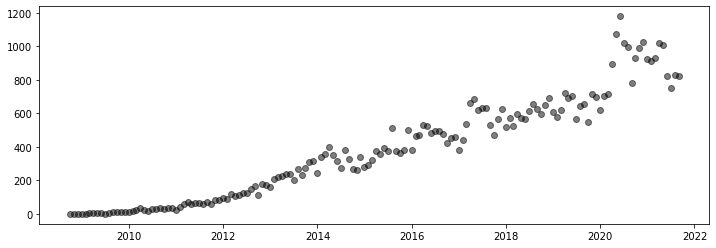

In [13]:
fig, ax = plt.subplots(figsize=(12,4))

ax.plot(
    stackoverflow_monthly.index,            # sumbu x
    stackoverflow_monthly['matplotlib'],    # sumbu y
    'ok',                                   # format
    alpha=0.5                               # transparansi
)

plt.show()

*Tips: Sebagai alternatif, metode `scatter()` dapat digunakan untuk membuat scatter plot, dalam hal ini kita tidak perlu menentukan format string (`fmt`).*

#### `2. Convert to Matplotlib dates.`

Pada contoh sebelumnya, kita menggunakan `stackoverflow_monthly.index` sebagai nilai x. Meskipun Matplotlib dapat menampilkan tahun pada sumbu x dengan benar, saat kita mencoba menambahkan best fit lines, kita akan mengalami masalah. Ini karena Matplotlib bekerja dengan tanggal sedikit berbeda. Untuk menyiasatinya, kita akan mengubah tanggal menjadi tanggal Matplotlib selagi kita membuat plot; lalu, pada akhirnya, kita akan memformat ulang ke dalam format yang mudah dipahami manusia.

Kita dapat menggunakan fungsi `date2num()` di modul `matplotlib.dates` untuk mengonversi tanggal Matplotlib:

In [20]:
import matplotlib.dates as mdates

x_axis_dates = mdates.date2num(stackoverflow_monthly.index)
x_axis_dates[:5]

array([14152., 14183., 14213., 14244., 14275.])

Sekarang, mari perbarui plot kita untuk menggunakan tanggal berikut:

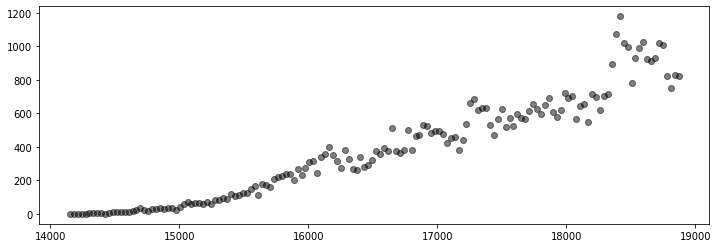

In [21]:
fig, ax = plt.subplots(figsize=(12,4))

ax.plot(
    x_axis_dates,                           # sumbu x
    stackoverflow_monthly['matplotlib'],    # sumbu y
    'ok',                                   # format
    alpha=0.5                               # transparansi
)

plt.show()

#### `3. Add the best fit lines.`

Kita akan menggunakan NumPy untuk mendapatkan best fit lines, yaitu polinomial derajat pertama dan derajat kedua. Metode `Polynomial.fit()` mencocokkan polinomial dengan derajat tertentu ke data kita dan mengembalikan [Polynomial instance](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.Polynomial.html), yang akan kita gunakan untuk mendapatkan titik (x, y) untuk membuat best fit lines:


```python
import numpy as np

degree = 1
poly = np.polynomial.Polynomial.fit(
    x_axis_dates, stackoverflow_monthly.matplotlib, degree
)
points = poly.linspace(n=100)  # 100 evenly-spaced points along the domain
```

Untuk masing-masing best fit line, kita akan memanggil metode `plot()` untuk menambahkannya ke scatterplot:


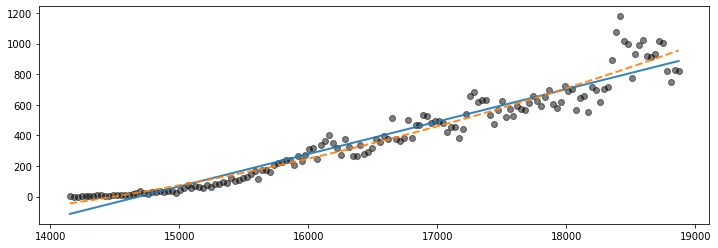

In [36]:
fig, ax = plt.subplots(figsize=(12,4))

ax.plot(
    x_axis_dates,                           # sumbu x
    stackoverflow_monthly['matplotlib'],    # sumbu y
    'ok',                                   # format
    alpha=0.5                               # transparansi
)


for degree, linestyle in zip([1, 2], ['solid', 'dashed']):

    poly = np.polynomial.Polynomial.fit(
        x_axis_dates,                               # sumbu x
        stackoverflow_monthly['matplotlib'],        # sumbu y
        degree                                      # derajat
    )

    ax.plot(
        *poly.linspace(),                           # menguraikan x dan y dari hasil fitting
        label=degree,                               # label
        linestyle=linestyle,                        # style garis
        linewidth=2,                                # ukuran garis
        alpha=0.9
    )

plt.show()

Sebelum melanjutkan, mari kita kemas logika ini dalam sebuah fungsi:

In [37]:
def add_best_fit_line(ax, x, y):
    for degree, linestyle in zip([1, 2], ['solid', 'dashed']):

        poly = np.polynomial.Polynomial.fit(
            x,                                  # sumbu x
            y,                                  # sumbu y
            degree                              # derajat
        )

        ax.plot(
            *poly.linspace(),                           # menguraikan x dan y dari hasil fitting
            label=degree,                               # label
            linestyle=linestyle,                        # style garis
            linewidth=2,                                # ukuran garis
            alpha=0.9
        )
        
    return ax

#### `4. Label the axes, add a legend, and despine.`

Selanjutnya, kita perlu menambahkan legenda sehingga kita dapat membedakan best fit lines. Sekarang juga saat yang tepat untuk memberi label pada sumbu kita, memberi judul pada plot kita, dan menyesuaikan batas sumbu x dan y (`xlim`/`ylim`). Di sini, kita mendefinisikan fungsi yang akan menambahkan semua ini ke plot kita dan menggunakan tanggal pertama dalam data sebagai awal sumbu x (kita akan meneruskannya sebagai `xmin`):

In [39]:
def add_label(ax, xmin):
    ax.set(
        xlabel='creation date',
        ylabel='total question',
        xlim=(xmin, None),
        ylim=(0, None),
        title='Matplotlib Questions per Month\n(since the creation of Stack Overflow)'
    )
    ax.legend(title='degree')               # menambahkan legenda dan judul dari legenda

    return ax


In [40]:
def despine(ax):
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    return ax

Mari kita panggil fungsi ini setelah kode plotting yang kita buat sejauh ini dan juga mendefinisikan plot kita:

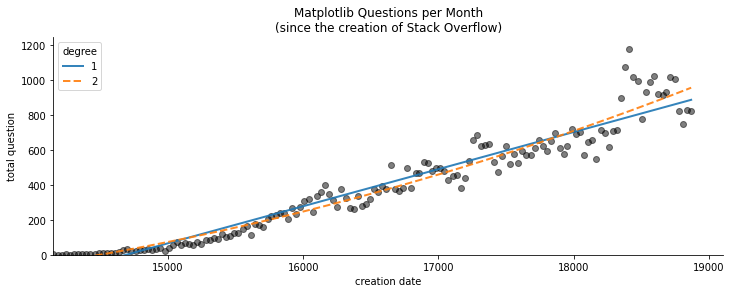

In [50]:
fig, ax = plt.subplots(figsize=(12,4))

ax.plot(
    x_axis_dates,                           # sumbu x
    stackoverflow_monthly['matplotlib'],    # sumbu y
    'ok',                                   # format
    alpha=0.5                               # transparansi
)

add_best_fit_line(ax, x_axis_dates, stackoverflow_monthly['matplotlib'])

add_label(ax, x_axis_dates[0])

despine(ax)

plt.show()

####  `5. Format both the x- and y-axis tick labels.`

Yang tersisa sekarang hanyalah membersihkan label centang pada sumbu: sumbu x harus memiliki tanggal yang dapat dibaca manusia, dan sumbu y dapat ditingkatkan dengan memformat angka agar mudah dibaca. Untuk keduanya, kita perlu mengakses objek `Axis` yang terdapat dalam objek `Axes` melalui atribut `xaxis`/`yaxis`:

```python
ax.xaxis # access the x-axis
ax.yaxis # access the y-axis
```

Dari sana, kita akan menggunakan dua metode untuk menyesuaikan *major* tick labels (sebagai lawan dari *minor*, yang saat ini plot kita tidak ditampilkan). Kita memanggil metode `set_major_locator()` untuk menyesuaikan lokasi ticks, dan `set_major_formatter()` untuk menyesuaikan format label dari ticks. Untuk sumbu x, kita akan memberi ticks pada interval 16 bulan dan memformat label sebagai `%b\n%Y`, yang menempatkan singkatan bulan di atas tahun. Fungsionalitas ini berasal dari modul `matplotlib.dates`:

```python
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=16))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
```

Modul `matplotlib.ticker` berisi kelas untuk lokasi dan pemformatan ticks untuk non-tanggal. Di sini, kita menggunakan kelas `StrMethodFormatter` untuk menyediakan string format seperti yang kita lihat dengan metode `str.format()`. Format khusus ini menetapkan bahwa label harus mengambang dengan koma sebagai pemisah ribuan dan nol digit setelah desimal:

```python
from matplotlib import ticker

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
```

Sekarang, mari kita gabungkan semuanya dalam sebuah fungsi:

In [64]:
from matplotlib import ticker

def format_axes(ax):
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=15))            # interval ticks per 16 (dalam hal ini bulan)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))            # memformat sumbu x menjadi tanggal
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))     # memformat sumbu y agar diberi thousand separator
    return ax

*Tips: Gunakan `EngFormatter` dan bukan `StrMethodFormatter` untuk notasi engineering.*

Kita sekarang memiliki semua bagian untuk visualisasi akhir:

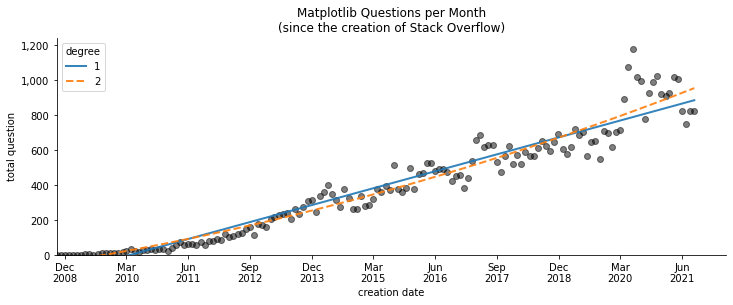

In [65]:
fig, ax = plt.subplots(figsize=(12,4))

ax.plot(
    x_axis_dates,                           # sumbu x
    stackoverflow_monthly['matplotlib'],    # sumbu y
    'ok',                                   # format
    alpha=0.5                               # transparansi
)

# menambahkan best fit line
add_best_fit_line(ax, x_axis_dates, stackoverflow_monthly['matplotlib'])

# menambahkan label
add_label(ax, x_axis_dates[0])

# menghilangkan garis tepi di atas dan di samping kanan
despine(ax)

# memformat axis
format_axes(ax)

# menampilkan
plt.show()

## **2. Bar plot**

Bar plot digunakan untuk membandingkan nilai (dari kolom numerikal) antara 2 kelompok atau lebih (dari kolom kategorikal). Nilai yang dibandingkan biasanya berupa aggregate bisa sum, average, count, dan seterusnya.

Sebelum kita mendalami terkait barplot. Kita akan coba memodifikasi terlebih dahulu area plot yang telah kita buat sebelumnya.

In [66]:
stackoverflow_daily = pd.read_csv('stackoverflow_daily.csv', index_col='creation_date', parse_dates=True)
stackoverflow_daily.tail()

,pandas,matplotlib,numpy,seaborn,geopandas,geoviews,altair,yellowbrick,vega,holoviews,hvplot,bokeh
creation_date,,,,,,,,,,,,
2021-09-08,132,33,49,5,2,0,2,1,1,1,0,2
2021-09-09,182,33,51,8,1,0,1,0,3,0,0,2
2021-09-10,132,19,44,7,4,0,0,0,2,0,0,2
2021-09-11,66,19,17,2,1,0,0,0,0,0,0,1
2021-09-12,69,14,24,3,0,1,0,0,0,0,0,0


In [75]:
subset = stackoverflow_daily.sum().nlargest(4)
subset.index

Index(['pandas', 'numpy', 'matplotlib', 'seaborn'], dtype='object')

In [71]:
top_libraries_monthly = stackoverflow_monthly.reindex(columns=subset.index)
top_libraries_monthly.tail()

,pandas,numpy,matplotlib,seaborn
creation_date,,,,
2021-04-30,4335,1351,1005,209
2021-05-31,4217,1316,824,174
2021-06-30,4331,1214,749,166
2021-07-31,4170,1228,826,153
2021-08-31,4175,1095,822,170


In [78]:
def annotate(ax, data):
    total = 0
    for area in ax.collections:
        library = area.get_label()
        last = data.last('1D')[library]
        last_day, last_value = last.index[0], last.iat[0]
        if library != 'seaborn':
            kwargs = {}
        else:
            kwargs = dict(
                xytext=(last_day + pd.Timedelta(days=20), (last_value + total) * 1.1),
                arrowprops=dict(arrowstyle='->')
            )

        ax.annotate(
            f' {library}: {data.loc["2021", library].median():,.0f}',
            xy=(last_day, last_value / 2 + total), ha='left', va='center', **kwargs
        )
        total += last_value
    return ax

Wilayah kiri atas area plot yang sebelumnya kita kerjakan mempunyai banyak ruang. Kita dapat menggunakan ruang ini untuk memberikan informasi tambahan dengan inset plot. Mari kita bekerja menambahkan sisipan bar plot yang menampilkan total pertanyaan per pustaka:

1. Add the inset `Axes` object to the `Figure` object.
2. Create the horizontal bar plot.
3. Label and format the plot.

#### `1. Add the inset Axes object to the Figure object`.

Pertama, kita perlu memodifikasi fungsi `area_plot()` untuk mengembalikan objek `Figure` juga:

In [79]:
def area_plot(data):

    fig, ax = plt.subplots(figsize=(12,3))

    ax.stackplot(
        mdates.date2num(data.index),            # sumbu x
        data.to_numpy().T,                      # sumbu y
        labels = data.columns
    )

    ax.set(
        xlabel='',
        ylabel='tagged questions',
        title='Stack Overflow Questions per Month'
    )

    ax.yaxis.set_major_formatter(ticker.EngFormatter())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

    despine(ax)
    annotate(ax, data)

    return fig, ax

Sekarang, kita dapat memanggil fungsi `area_plot()` yang telah diperbarui dan menggunakan objek `Figure` yang dikembalikannya untuk menambahkan inset plot melalui metode `add_axes()`. Metode ini menerima dimensi sebagai rangkaian 4 nilai, yang direpresentasikan sebagai persentase dimensi `Figure`:
1. `left`: Offset dari tepi kiri `Figure` (yaitu `x`).
2. `bottom`: Offset dari tepi bawah `Figure` (yaitu, `y`).
3. `width`: Lebar sisipan.
4. `height`: Ketinggian sisipan.

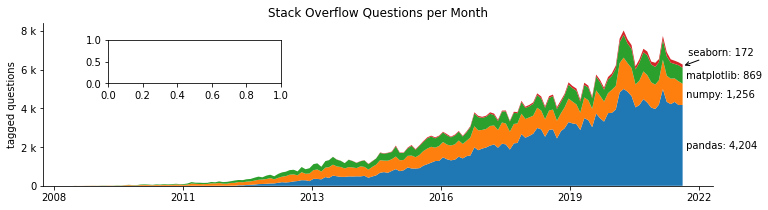

In [88]:
fig, ax = area_plot(top_libraries_monthly)
inset_ax = fig.add_axes([0.2, 0.6, 0.2, 0.2])

*Tips: Cek [axes_grid1 toolkit](https://matplotlib.org/stable/tutorials/toolkits/axes_grid.html#insetlocator) jika Anda ingin inset berisi versi data yang "diperbesar".*

#### `2. Create the horizontal bar plot.`

Selanjutnya, kita menggunakan metode `barh()` untuk menambahkan batang horizontal ke sisipan. Setiap batang akan mewakili total pertanyaan untuk masing-masing pustaka di area plot, jadi kita juga perlu memastikan warnanya selaras. Untuk ini, kita menggunakan atribut `collections` untuk mengakses setiap bagian area plot dan mengambil warnanya dengan metode `get_facecolor()`:

In [95]:
total_qs = top_libraries_monthly.sum()
total_qs.index

Index(['pandas', 'numpy', 'matplotlib', 'seaborn'], dtype='object')

In [107]:
colors = {area.get_label(): area.get_facecolor() for area in ax.collections}
colors

{'pandas': array([[0.12156863, 0.46666667, 0.70588235, 1.        ]]),
 'numpy': array([[1.        , 0.49803922, 0.05490196, 1.        ]]),
 'matplotlib': array([[0.17254902, 0.62745098, 0.17254902, 1.        ]]),
 'seaborn': array([[0.83921569, 0.15294118, 0.15686275, 1.        ]])}

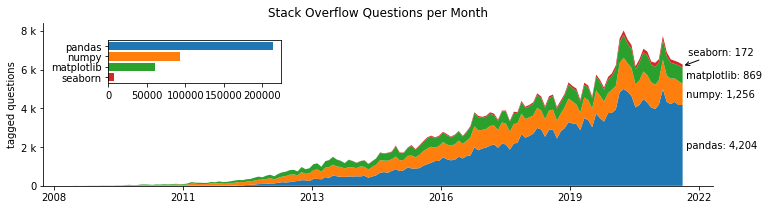

In [106]:
fig, ax = area_plot(top_libraries_monthly)
inset_ax = fig.add_axes([0.2, 0.6, 0.2, 0.2])
colors = {area.get_label(): area.get_facecolor() for area in ax.collections}

inset_ax.barh(
    total_qs.index,          # index (sumbu y)
    total_qs.values,         # sumbu x
    color=[colors[label] for label in total_qs.index]
)

inset_ax.yaxis.set_inverted(True)       # mengurutkan dengan urutan descending

#### `3. Label and format the plot.`

Cara kerja pelabelan dan pemformatan inset sama seperti yang kita lihat sebelumnya:

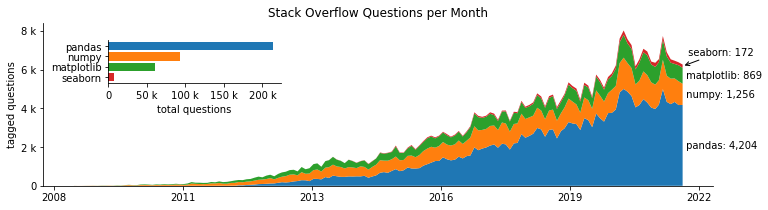

In [111]:
fig, ax = area_plot(top_libraries_monthly)
inset_ax = fig.add_axes([0.2, 0.6, 0.2, 0.2])
colors = {area.get_label(): area.get_facecolor() for area in ax.collections}

inset_ax.barh(
    total_qs.index,          # index (sumbu y)
    total_qs.values,         # sumbu x
    color=[colors[label] for label in total_qs.index]
)

inset_ax.yaxis.set_inverted(True)       # mengurutkan dengan urutan descending

despine(inset_ax)
inset_ax.set_xlabel('total questions')
inset_ax.xaxis.set_major_formatter(ticker.EngFormatter())

plt.show()

Komentar terakhir pada contoh ini:

- Tata letak subplot yang lebih rumit dapat dibuat dengan [GridSpec](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/gridspec_multicolumn.html#sphx-glr-gallery-subplots-axes-and-figures-gridspec-multicolumn-py ) atau metode [Figur.subplot_mosaic()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot_mosaic.html), yang ditambahkan di v3.3 untuk memudahkan pembuatan tata letak yang kompleks .

#### **Annotating bars**

Inset yang kita buat hanya menampilkan data untuk empat pustaka di kumpulan data Stack Overflow agar sesuai dengan plot area. Karena skala pustaka lain yang lebih kecil, tidak masuk akal untuk memasukkan mereka ke dalam area plot; namun, kita dapat memvisualisasikan total pertanyaan untuk masing-masing pustaka dengan bar plot jika kita menggunakan skala log untuk sumbu x. Kali ini bar plot kita tidak hanya berupa sisipan, dan kita akan mempelajari cara memberi anotasi pada bar plot.

In [116]:
questions_per_library = stackoverflow_daily.sum().sort_values()
questions_per_library

yellowbrick        54
geoviews           63
hvplot             92
holoviews         542
vega              598
altair            804
geopandas        1652
bokeh            4386
seaborn          7414
matplotlib      60554
numpy           93797
pandas         214919
dtype: int64

#### `1. Create the bar plot.`
Kami sekali lagi menggunakan metode `barh()` untuk membuat horizontal bar plot; namun, perhatikan bahwa metode `bar()` dapat digunakan untuk membuat vertikal bar plot:


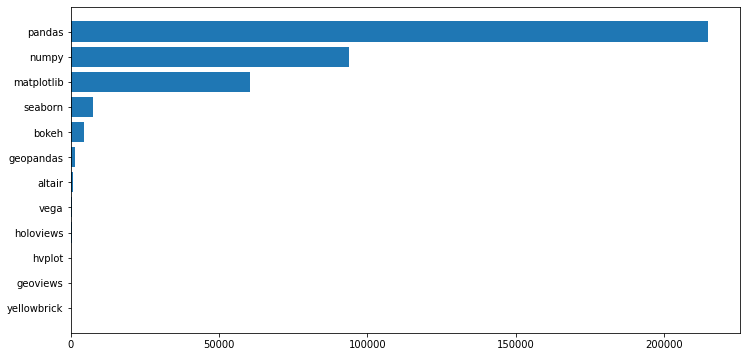

In [122]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.barh(
    questions_per_library.index,
    questions_per_library.values
)

plt.show()

#### `2. Label, format, and apply a log scale to the plot.`
Untuk mengubah skala sumbu, kita menentukan nilai untuk `xscale`/`yscale` atau memasukkan nilai ke metode `set_xscale()`/`set_yscale()`::

```python
ax.set_xscale('log')
ax.set(xscale='log')
```

Sekarang, kita dapat melihat semua batang:

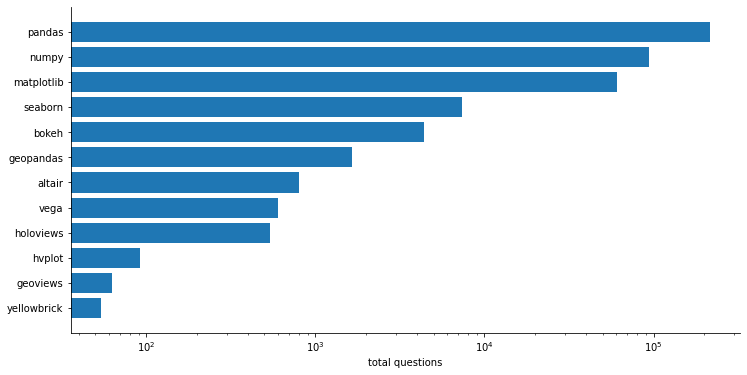

In [124]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.barh(
    questions_per_library.index,
    questions_per_library.values
)

ax.set(
    xlabel='total questions',
    xscale='log'
)

despine(ax)

plt.show()

#### `3. Annotate each of the bars.`

Untuk memberi anotasi pada batang, kita perlu mengambilnya dari objek `Axes`, serupa dengan cara kita mengambil warna dari plot area. Untuk mengakses batang, kita menggunakan atribut `patches`. Di sini, kita menulis fungsi untuk mengulangi setiap patch ini dan memberi anotasi pada setiap batang dengan jumlah total pertanyaan untuk pustaka tersebut:

In [125]:
def annotate_bars(ax):
    for bar in ax.patches:
        x, y = bar.get_xy()
        ax.text(
            x + bar.get_width(), y + bar.get_height()/2, f'{bar.get_width():,d} ',
            va='center', ha='right', color='white'
        )
    return ax

Jika digabungkan, visualisasi akhir kita terlihat seperti ini:

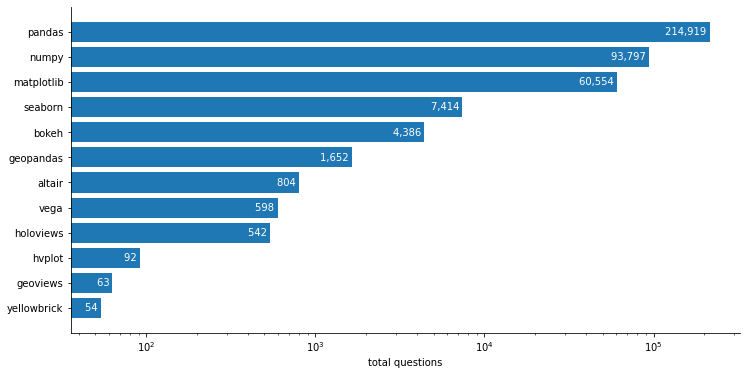

In [126]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.barh(
    questions_per_library.index,
    questions_per_library.values
)

ax.set(
    xlabel='total questions',
    xscale='log'
)

despine(ax)

annotate_bars(ax)

plt.show()

## **3. Stacked Bar plot**

Untuk beberapa contoh berikutnya, kita akan membuat stacked bar plot yang menunjukkan kemunculan tag pustaka secara bersamaan. Hal ini memberi kita gambaran tentang hubungan antara pustaka dan bagaimana orang menggunakannya. Data kita terlihat sebagai berikut. Di sini, kita melihat bahwa kejadian bersama terbesar dengan **hvplot** adalah **holoviews** diikuti oleh **bokeh**.

In [135]:
co_occur = pd.read_csv('stackoverflow_cooccurence.csv', index_col='library')

In [137]:
co_occur.style.background_gradient(axis=None, vmin=0, vmax=1)

,hvplot,geoviews,seaborn,holoviews,geopandas,matplotlib,numpy,bokeh,pandas
library,,,,,,,,,
hvplot,0.000000,0.032609,0.021739,0.539855,0.048913,0.023551,0.000000,0.110507,0.103261
geoviews,0.047619,0.000000,0.000000,0.431217,0.058201,0.039683,0.007937,0.140212,0.084656
seaborn,0.000270,0.000000,0.000000,0.000135,0.000607,0.468033,0.015871,0.002001,0.230780
holoviews,0.091636,0.050123,0.001845,0.000000,0.003075,0.030750,0.010148,0.371771,0.066113
geopandas,0.002724,0.002220,0.002724,0.001009,0.000000,0.118644,0.009988,0.011703,0.250504
matplotlib,0.000036,0.000041,0.057304,0.000275,0.003237,0.000000,0.087198,0.001594,0.135548
numpy,0.000000,0.000005,0.001254,0.000059,0.000176,0.056294,0.000000,0.000144,0.167267
bokeh,0.002318,0.002014,0.003382,0.045942,0.004408,0.022002,0.003078,0.000000,0.087855
pandas,0.000044,0.000025,0.007961,0.000167,0.001926,0.038191,0.073000,0.001793,0.000000


*Tips: Untuk mengetahui lebih lanjut tentang style DataFrames, lihat dokumentasi pandas [disini](https://pandas.pydata.org/docs/user_guide/style.html).*

Perhatikan bahwa diagonal berisi angka nol karena kita juga ingin memahami berapa persentase pertanyaan per pustaka yang juga ditandai dengan pustaka lain dalam kumpulan data ini. Misalnya, sebagian besar pertanyaan yang diberi tag **hvplot** atau **geoviews** juga diberi tag dengan pustaka lain dalam daftar kita, namun pertanyaan yang diberi tag **pandas** hanya diberi tag dengan pustaka lain sebanyak 12,3%:

In [139]:
co_occur.sum(axis=1)

library
hvplot        0.880435
geoviews      0.809524
seaborn       0.717696
holoviews     0.625461
geopandas     0.399516
matplotlib    0.285233
numpy         0.225199
bokeh         0.170999
pandas        0.123107
dtype: float64

Dalam contoh ini, kita juga akan melihat cara lain memformat sumbu dengan `ticker` dan mempelajari cara menyesuaikan warna. Mari kita lakukan langkah-langkah berikut:
1. Create the stacked bar plot.
2. Add the legend.
3. Label and format the plot.
4. Annotate the bars.
5. Change the color scheme.

#### `1. Create the stacked bar plot.`

Untuk membuat stacked bar plot, kita masih bisa menggunakan metode `barh()`; namun, kita harus melakukan beberapa panggilan fungsi tersebut, setiap kali menentukan di mana titik awalnya seharusnya berada (yaitu, akhir dari bagian batang sebelumnya). Kita akan mengemas logika ini dalam sebuah fungsi:

In [142]:
co_occur.index

Index(['hvplot', 'geoviews', 'seaborn', 'holoviews', 'geopandas', 'matplotlib',
       'numpy', 'bokeh', 'pandas'],
      dtype='object', name='library')

In [151]:
def stacked_bars(data):

    fig, ax = plt.subplots(figsize=(12,6))
    libraries = data.index

    last = 0
    for library in libraries:
        ax.barh(
            data.index,                # index
            data[library],             # sumbu x
            label=library,
            left=last
        )
        last += data[library]

    ax.yaxis.set_inverted(True)

    return despine(ax)


Memanggil fungsi kita memberi kita awal dari visualisasi stacked bar plot:

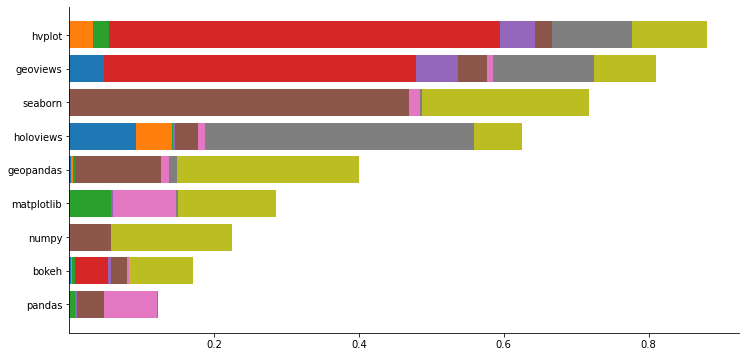

In [154]:
ax = stacked_bars(co_occur)

#### `2. Add the legend.`

Selanjutnya, kita menambahkan legenda untuk memahami arti warna:

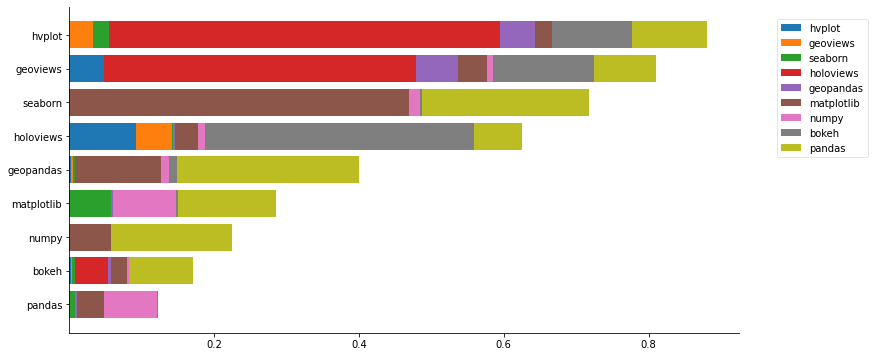

In [161]:
ax = stacked_bars(co_occur)
ax.legend(loc='center right', framealpha=0.5, bbox_to_anchor=(1.2, 0.75))
plt.show()

#### `3. Label and format the plot.`

Kemudian, kita beri label pada sumbu x dan atur batas sumbu x tersebut (`xlim`) sehingga berubah dari 0% menjadi 100%. Kita juga menggunakan `ticker.PercentFormatter` untuk menampilkan label centang sumbu x sebagai persentase. Perhatikan bahwa kita memasukkan `xmax=1` saat membuat instance karena data kita sudah berisi persentase, namun meneruskan nilai maksimum dalam data akan menghitung persentasenya:

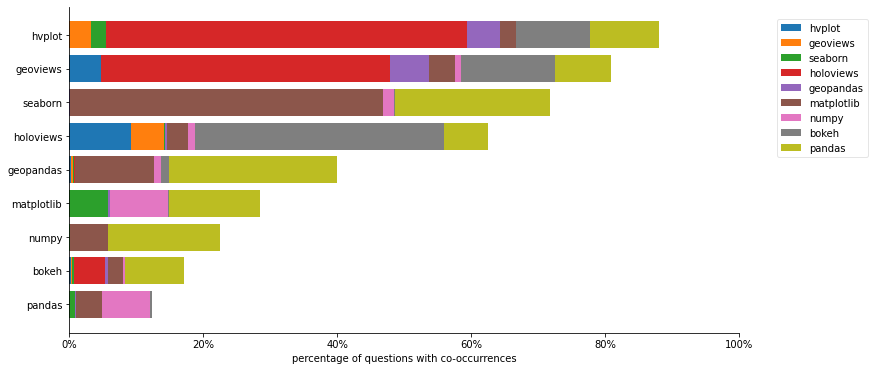

In [164]:
ax = stacked_bars(co_occur)

ax.legend(loc='center right', framealpha=0.5, bbox_to_anchor=(1.2, 0.75))
ax.set(
    xlabel='percentage of questions with co-occurrences',
    xlim=(0,1)
)

ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))

plt.show()

Sebelum melanjutkan, mari perbarui fungsi kita untuk memasukkan apa yang kita miliki sejauh ini:

In [165]:
def stacked_bars(data):

    fig, ax = plt.subplots(figsize=(12,6))
    libraries = data.index

    last = 0
    for library in libraries:
        ax.barh(
            data.index,                # index
            data[library],             # sumbu x
            label=library,
            left=last
        )
        last += data[library]

    ax.yaxis.set_inverted(True)

    ax.legend(loc='center right', framealpha=0.5, bbox_to_anchor=(1.2, 0.75))
    ax.set(
        xlabel='percentage of questions with co-occurrences',
        xlim=(0,1)
    )

    ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))

    return despine(ax)

#### `4. Annotate the bars.`

Seperti contoh sebelumnya, kita memberi anotasi pada batang kita setelah mengakses masing-masing batang melalui atribut `patches` pada objek `Axes`. Namun, kali ini kami hanya memberi label pada batang yang nilainya melampaui ambang batas &ndash; perhatikan bahwa nilai batang di sini adalah lebarnya:

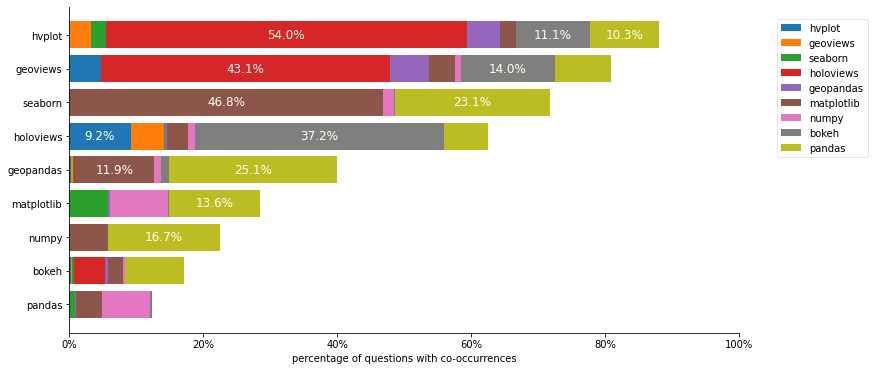

In [183]:
ax = stacked_bars(co_occur)

for patch in ax.patches:
    width = patch.get_width()
    if width >= 0.09:
        ax.text(
            patch.get_x() + width/2,
            patch.get_y() + patch.get_height()/2,
            f'{width:.1%}',
            color='ivory',
            fontsize=12,
            ha='center',
            va='center'
        )

Mari kita kemas logika anotasi sebelum melanjutkan:

In [185]:
def annotate_bars(ax, threshold):
    for patch in ax.patches:
        width = patch.get_width()
        if width >= threshold:
            ax.text(
                patch.get_x() + width/2,                    # posisi x
                patch.get_y() + patch.get_height()/2,       # posisi y
                f'{width:.1%}',                             # format penulisan
                color='ivory',                              # warna
                fontsize=12,                                # ukuran huruf
                ha='center',
                va='center'
            )

#### `5. Change the color scheme.`
Throughout this workshop, we have been using default colormaps. For this visualization, we will take a look at how to change the colormap. Note that this is only one way of working with colormaps.

Sejauh ini, kita menggunakan default colormaps. Untuk visualisasi ini, kita akan melihat cara mengubah colormap. Perhatikan bahwa ini hanyalah salah satu cara untuk bekerja dengan colormap.

Untuk contoh ini, kita akan memilih colormap kualitatif `tab10` dan membalikkan urutannya:

In [188]:
import matplotlib as mpl

cmap = mpl.colormaps['tab10'].reversed()

*Catatan: Colormap yang kita pilih adalah colormap default, tetapi membaliknya akan mengubah urutan penetapan warna. Karena kita memiliki sembilan elemen dan sepuluh warna, kali ini kita akan melihat warna baru. Lihat daftar lengkap colormap [disini](https://matplotlib.org/stable/gallery/color/colormap_reference.html#sphx-glr-gallery-color-colormap-reference-py).*

Objek colormap adalah **callable**:

In [189]:
[cmap(i) for i in range(10)]

[(0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333, 1.0),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0),
 (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)]

*Tips: untuk belajar lebih lanjut tentang callables [disini](https://www.pythonmorsels.com/topics/callables/).*

Artinya saat kita memperbarui fungsi `stacked_bars()` untuk menerima colormap, kita juga perlu memperbarui loop `for`:

In [193]:
def stacked_bars(data, color):

    fig, ax = plt.subplots(figsize=(12,6))
    libraries = data.index
    cmap = mpl.colormaps[color].reversed()

    last = 0
    for i, library in enumerate(libraries):
        ax.barh(
            data.index,                # index
            data[library],             # sumbu x
            label=library,
            left=last,
            color=cmap(i)
        )
        last += data[library]

    ax.yaxis.set_inverted(True)

    ax.legend(loc='center right', framealpha=0.5, bbox_to_anchor=(1.2, 0.75))
    ax.set(
        xlabel='percentage of questions with co-occurrences',
        xlim=(0,1)
    )

    ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))

    return despine(ax)

Memanggil fungsi yang diperbarui dengan colormap yang dibalik akan mengubah warna pada setiap batang:

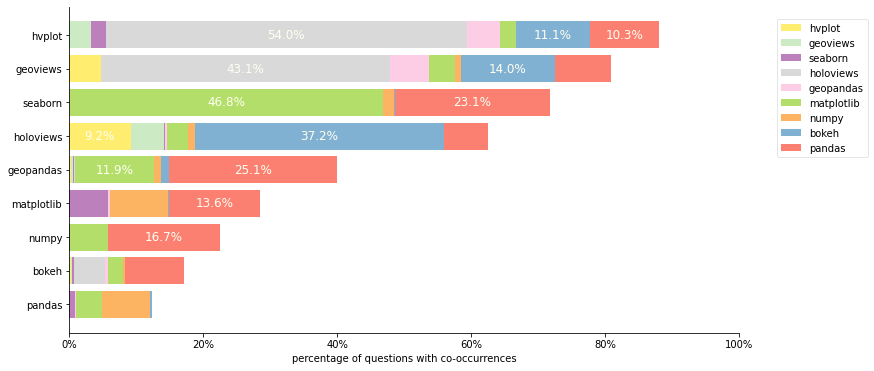

In [197]:
ax = stacked_bars(co_occur, 'Set3')
annotate_bars(ax, 0.09)

## **4. Pie Chart**

Selain menggunakan Bar plot, kita juga bisa melihat hubungan antara variabel categorical dan numerical menggunakan pie chart. Pie chart dapat digunakan untuk menampilkan proporsi/persentase dari beberapa kelompok. namun, usahakan hindari menggunakan pie chart terutama jika nilai unik dari kolom kategorikalnya terlalu banyak.

Pada kasus ini kita akan membuat piechart untuk menampilkan proporsi dari 4 pustaka yang paling sering ditanyakan di Stack Overflow.

In [198]:
subset

pandas        214919
numpy          93797
matplotlib     60554
seaborn         7414
dtype: int64

Untuk membuat pie chart, kita bisa menggunakan metode `pie()`

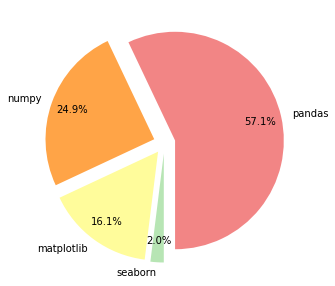

In [216]:
fig, ax = plt.subplots(figsize=(5, 5))

ax.pie(
    subset,                 # series
    labels=subset.index,    # label
    autopct='%1.1f%%',      # anotasi
    colors=['#F28585', '#FFA447', '#FFFC9B', '#B7E5B4'],
    startangle=270,
    pctdistance=0.8,        # posisi anotasi
    explode=[0.1, 0.1, 0.1, 0.1]
)

plt.show()

Selanjutnya, kita bisa mengubahnya menjadi dalam bentuk donut dengan menambahkan lingkaran putih ditengahnya menggunakan metode `add_artist()`.

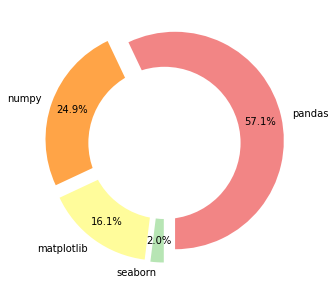

In [221]:
fig, ax = plt.subplots(figsize=(5, 5))

ax.pie(
    subset,                 # series
    labels=subset.index,    # label
    autopct='%1.1f%%',      # anotasi
    colors=['#F28585', '#FFA447', '#FFFC9B', '#B7E5B4'],
    startangle=270,
    pctdistance=0.8,        # posisi anotasi
    explode=[0.1, 0.1, 0.1, 0.1]
)

# menambahkan lingkaran di tengah
fig = plt.gcf()
centre_circle = plt.Circle((0,0), 0.7, fc='white')      # Circle((x, y), radius, fc/warna)
fig.gca().add_artist(centre_circle)

plt.show()

Untuk mempercantik kita bisa menambahkan judul dan keterangan dari grafik tersebut.

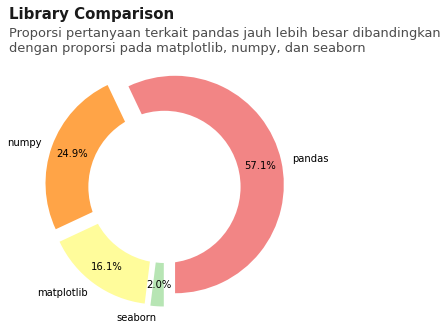

In [229]:
fig, ax = plt.subplots(figsize=(5, 5))

ax.pie(
    subset,                 # series
    labels=subset.index,    # label
    autopct='%1.1f%%',      # anotasi
    colors=['#F28585', '#FFA447', '#FFFC9B', '#B7E5B4'],
    startangle=270,
    pctdistance=0.8,        # posisi anotasi
    explode=[0.1, 0.1, 0.1, 0.1]
)

# menambahkan lingkaran di tengah
fig = plt.gcf()
centre_circle = plt.Circle((0,0), 0.7, fc='white')      # Circle((x, y), radius, fc/warna)
fig.gca().add_artist(centre_circle)

# menambahkan judul dan keterangan

fig.text(
    0.08,
    0.97,
    "Library Comparison",
    color='#1a1a1a',
    fontsize=15,
    weight='bold'
)

fig.text(
    0.08,
    0.88,
    "Proporsi pertanyaan terkait pandas jauh lebih besar dibandingkan\ndengan proporsi pada matplotlib, numpy, dan seaborn",
    color='#4d4d4d',
    fontsize=13,
    ha='left'
)

plt.show()

## **5. Heatmap**

Heatmap adalah teknik visualisasi data yang menunjukkan besarnya sebuah fenomena dari warna yang ditampilkan. Heatmap berisi nilai-nilai yang diwakili dengan warna-warna tertentu dalam plot. Biasanya warna grafik yang lebih gelap menunjukkan nilai yang lebih tinggi daripada yang lebih terang. Bisa berlaku sebaliknya juga. Untuk nilai yang sangat berbeda, warna yang berbeda juga dapat digunakan.

Pada kasus sebelumnya kita membuat stacked bar plot yang menunjukkan kemunculan tag pustaka secara bersamaan dari data berikut:

In [231]:
co_occur.style.background_gradient(axis=None, vmin=0, vmax=1)

,hvplot,geoviews,seaborn,holoviews,geopandas,matplotlib,numpy,bokeh,pandas
library,,,,,,,,,
hvplot,0.000000,0.032609,0.021739,0.539855,0.048913,0.023551,0.000000,0.110507,0.103261
geoviews,0.047619,0.000000,0.000000,0.431217,0.058201,0.039683,0.007937,0.140212,0.084656
seaborn,0.000270,0.000000,0.000000,0.000135,0.000607,0.468033,0.015871,0.002001,0.230780
holoviews,0.091636,0.050123,0.001845,0.000000,0.003075,0.030750,0.010148,0.371771,0.066113
geopandas,0.002724,0.002220,0.002724,0.001009,0.000000,0.118644,0.009988,0.011703,0.250504
matplotlib,0.000036,0.000041,0.057304,0.000275,0.003237,0.000000,0.087198,0.001594,0.135548
numpy,0.000000,0.000005,0.001254,0.000059,0.000176,0.056294,0.000000,0.000144,0.167267
bokeh,0.002318,0.002014,0.003382,0.045942,0.004408,0.022002,0.003078,0.000000,0.087855
pandas,0.000044,0.000025,0.007961,0.000167,0.001926,0.038191,0.073000,0.001793,0.000000


Sekarang kita akan coba membuat heatmap dari data yang sama dengan menggunakan metode `imshow()`.

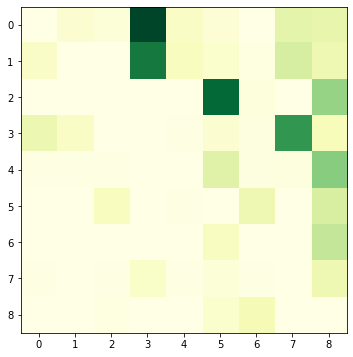

In [237]:
# membuat heatmap
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(co_occur.values, cmap='YlGn')

Selanjutnya kita akan menampilkan setiap ticks dan melabelinya sesuai dengan pustaka yang ada pada data.

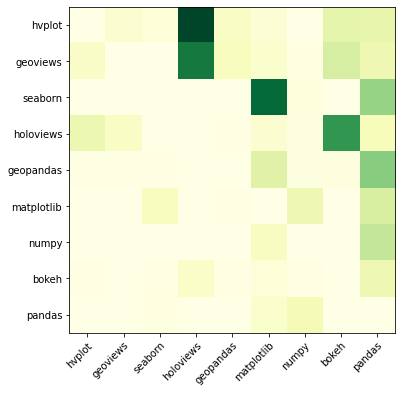

In [243]:
# membuat heatmap
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(co_occur.values, cmap='YlGn')

# memberi label
ax.set_yticks(np.arange(len(co_occur.index)), labels=co_occur.index)
ax.set_xticks(np.arange(len(co_occur.columns)), labels=co_occur.columns)

plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

plt.show()

Agar nilai dari setiap kotak bisa terlihat jelas, maka kita akan tampilkan anotasi pada grafik tersebut dengan cara melooping setiap nilai pada data dan menampilkannya dalam bentuk teks:

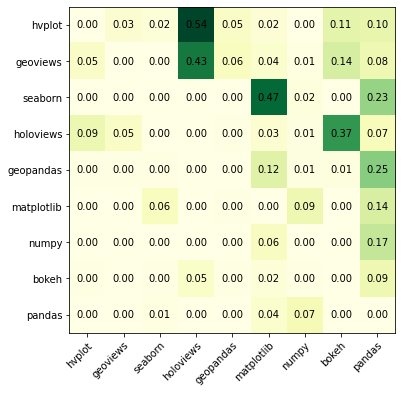

In [246]:
# membuat heatmap
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(co_occur.values, cmap='YlGn')

# memberi label
ax.set_yticks(np.arange(len(co_occur.index)), labels=co_occur.index)
ax.set_xticks(np.arange(len(co_occur.columns)), labels=co_occur.columns)

plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

# memberi anotasi
for i in range(len(co_occur.index)):
    for j in range(len(co_occur.columns)):
        text = ax.text(j, i, f'{co_occur.iloc[i, j]:.2f}', ha='center', va='center')

plt.show()

Untuk mempercantik tampilan akhir, kita bisa tambahkan judul dan colorbar.

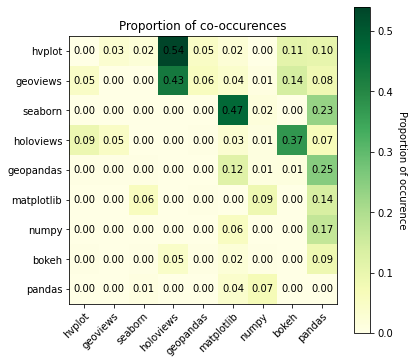

In [251]:
# membuat heatmap
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(co_occur.values, cmap='YlGn')

# memberi label
ax.set_yticks(np.arange(len(co_occur.index)), labels=co_occur.index)
ax.set_xticks(np.arange(len(co_occur.columns)), labels=co_occur.columns)

plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

# memberi anotasi
for i in range(len(co_occur.index)):
    for j in range(len(co_occur.columns)):
        text = ax.text(j, i, f'{co_occur.iloc[i, j]:.2f}', ha='center', va='center')

# menambah colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Proportion of occurence", rotation=-90, va='bottom')

ax.set_title('Proportion of co-occurences')

plt.show()

## **6. Plotting with Seaborn**

Seaborn adalah library untuk membuat grafik dan statistik dengan menggunakan Python. Library ini di bangun berdasarkan library matplotlib serta terintegrasi dengan struktur data pada panda.

Kita dapat menggunakan sebaorn untuk membuat beberapa grafik di antaranya:

In [253]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### `Histogram`

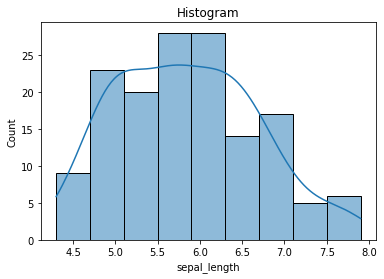

In [259]:
fig, ax = plt.subplots(figsize=(6,4))
ax = sns.histplot(data=df, x='sepal_length', kde=True)
ax.set_title('Histogram')
plt.show()

### `Boxplot`

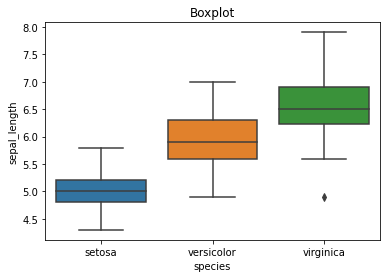

In [262]:
fig, ax = plt.subplots(figsize=(6,4))
ax = sns.boxplot(data=df, y='sepal_length', x='species')
ax.set_title('Boxplot')
plt.show()

### `Violin plot`

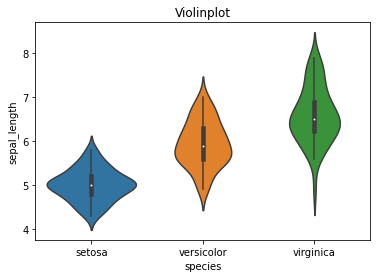

In [263]:
fig, ax = plt.subplots(figsize=(6,4))
ax = sns.violinplot(data=df, y='sepal_length', x='species')
ax.set_title('Violinplot')
plt.show()

### `Barplot`

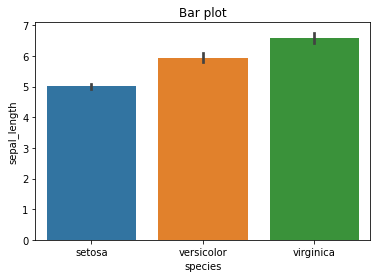

In [268]:
fig, ax = plt.subplots(figsize=(6,4))
ax = sns.barplot(data=df, y='sepal_length', x='species', estimator=np.mean)
ax.set_title('Bar plot')
plt.show()

# by default menggunakan rata-rata

### `Countplot`

In [271]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

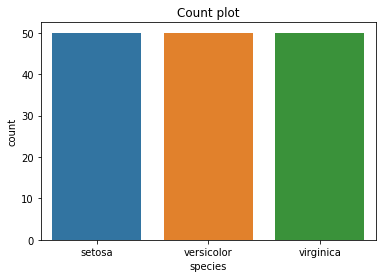

In [270]:
fig, ax = plt.subplots(figsize=(6,4))
ax = sns.countplot(data=df, x='species')
ax.set_title('Count plot')
plt.show()

### `Scatterplot`

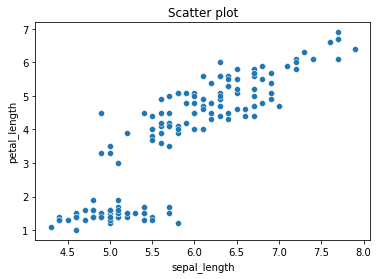

In [272]:
fig, ax = plt.subplots(figsize=(6,4))
ax = sns.scatterplot(data=df, x='sepal_length', y='petal_length')
ax.set_title('Scatter plot')
plt.show()

### `Regplot`

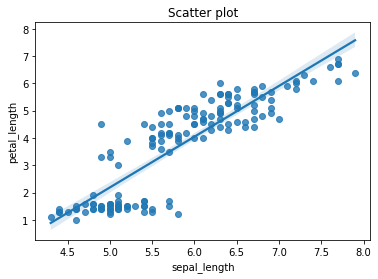

In [273]:
fig, ax = plt.subplots(figsize=(6,4))
ax = sns.regplot(data=df, x='sepal_length', y='petal_length')
ax.set_title('Scatter plot')
plt.show()

### `Jointplot`

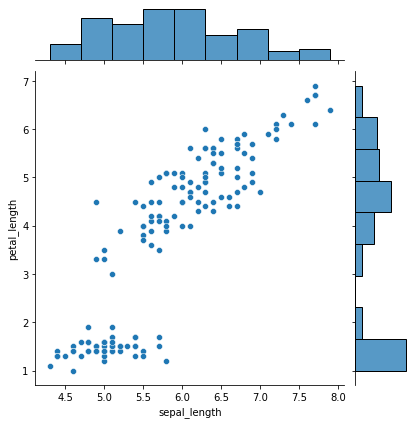

In [278]:
sns.jointplot(data=df, x='sepal_length', y='petal_length', kind='scatter')
plt.show()

### `Pairplot`

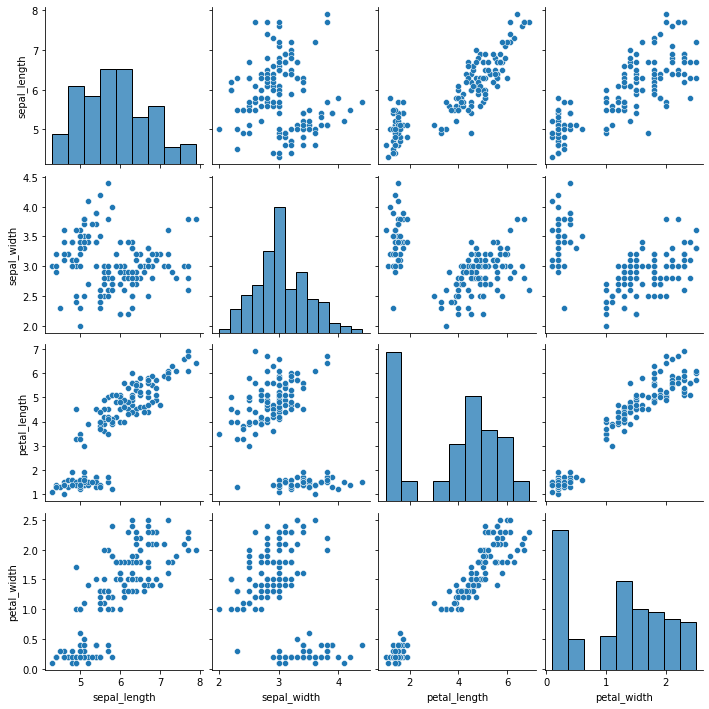

In [279]:
sns.pairplot(df)
plt.show()

### `Heatmap`

In [286]:
df.corr(method='spearman')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.166778,0.881898,0.834289
sepal_width,-0.166778,1.000000,-0.309635,-0.289032
petal_length,0.881898,-0.309635,1.000000,0.937667
petal_width,0.834289,-0.289032,0.937667,1.000000


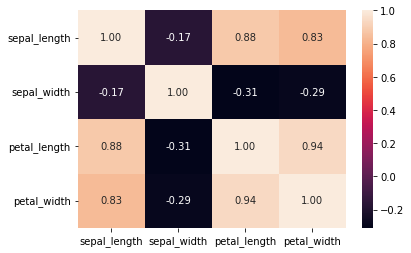

In [287]:
sns.heatmap(df.corr(method='spearman'), annot=True, fmt='.2f')
plt.show()